<a href="https://colab.research.google.com/github/muu86/golf_prj/blob/main/swing_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd drive/MyDrive/Colab\ Notebooks/golfdb

/content/drive/MyDrive/Colab Notebooks/golfdb


In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## event name

- 0 : Address
- 1 : Toe-up
- 2 : Mid-backswing
- 3 : Top
- 4 : Mid-downswing
- 5 : Impact
- 6 : Mid-follow-through
- 7 : Finish

## 먼저 실행할 코드들

In [5]:
df = pd.read_pickle('data/face_on.pkl')

In [6]:
df

,id,youtube_id,player,sex,club,view,slow,events,bbox,split
8,8,-M5SITXMA2Y,CRISTIE KERR,f,driver,face-on,0,"[288, 317, 333, 335, 347, 352, 355, 357, 371, ...","[0.0007812500000000111, 0.0006944444444444445,...",4
10,10,gOBVh7fzyZo,STEVE STRICKER,m,driver,face-on,0,"[395, 475, 488, 492, 499, 504, 507, 509, 524, ...","[0.10625, 0.0006944444444444445, 0.80078125, 1.0]",1
14,14,vN3Uc_EhnnY,GREG NORMAN,m,driver,face-on,0,"[457, 497, 513, 515, 523, 527, 531, 533, 546, ...","[0.05234375000000001, 0.0006944444444444445, 0...",2
19,19,iW323nsTGtU,HYO JOO KIM,f,driver,face-on,0,"[271, 310, 328, 333, 344, 348, 352, 355, 377, ...","[0.07343750000000002, 0.0006944444444444445, 0...",3
25,25,pxO_eGmiDFk,PORNANONG PHATLUM,f,driver,face-on,0,"[301, 338, 362, 370, 379, 383, 387, 389, 407, ...","[0.05625000000000001, 0.0006944444444444445, 0...",3
...,...,...,...,...,...,...,...,...,...,...
1348,1348,Yigxi0Oc5V4,BEN ROETHLISBERGER,m,driver,face-on,0,"[331, 566, 581, 586, 594, 600, 603, 605, 620, ...","[0.06640625000000001, 0.0006944444444444445, 0...",2
1352,1352,9Ifs0EQmRZk,BEATRIZ RECARI,f,driver,face-on,0,"[271, 465, 482, 487, 494, 497, 501, 504, 523, ...","[0.06250000000000001, 0.0006944444444444445, 0...",2
1374,1374,6K1FD0sOwoI,ALISON LEE,f,driver,face-on,0,"[151, 420, 444, 451, 459, 464, 468, 471, 491, ...","[0.140625, 0.0006944444444444445, 0.7171875, 0...",2
1388,1388,GXn3A0IuWsE,ROGER CLEMENS,m,driver,face-on,0,"[211, 255, 265, 270, 276, 280, 284, 286, 297, ...","[0.12109375, 0.09583333333333334, 0.65703125, ...",1


In [7]:
kp = pd.read_pickle('data/keypoints_dic.pickle')

In [ ]:
kp

In [8]:
def p3_angle(a, b, c):
  a = np.array(a)
  b = np.array(b)
  c = np.array(c)
  
  ba = a - b
  bc = c - b

  cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
  angle = np.arccos(cosine_angle)

  return np.degrees(angle)

In [9]:
# 타이거 우즈 스윙 데이터
import pickle

with open('woods.pkl', 'rb') as f:
  woods_data = pickle.load(f)

woods_data

{0: array([[1.9870158e+02, 2.5281937e+02, 8.5509098e-01],
        [2.0171310e+02, 2.7083734e+02, 9.2718118e-01],
        [1.5361508e+02, 2.7390829e+02, 9.1418183e-01],
        [1.7461949e+02, 3.6400467e+02, 8.8575798e-01],
        [1.9580568e+02, 4.3313437e+02, 8.6118454e-01],
        [2.4978700e+02, 2.5886136e+02, 8.8883716e-01],
        [2.3486555e+02, 3.4894019e+02, 8.7093931e-01],
        [2.1679619e+02, 4.2101868e+02, 8.3981621e-01],
        [2.0482535e+02, 3.9408548e+02, 8.3487892e-01],
        [1.7772273e+02, 3.9415405e+02, 8.0496436e-01],
        [1.5382246e+02, 4.9631384e+02, 9.0263999e-01],
        [1.2979953e+02, 6.2543866e+02, 8.8349229e-01],
        [2.3482294e+02, 3.9407599e+02, 7.8961450e-01],
        [2.5282890e+02, 4.9923633e+02, 8.8804567e-01],
        [2.6187146e+02, 6.1641534e+02, 8.2580125e-01],
        [1.8376199e+02, 2.4679047e+02, 8.1530416e-01],
        [2.0471356e+02, 2.4386069e+02, 8.1146318e-01],
        [1.7469267e+02, 2.2881468e+02, 5.6184900e-01],
       

## 1번 Toe-up 자세 (Takeaway)

### (정면)어깨 손 삼각형 유지

어드레스에서 테이크어웨이까지 양 어깨와 손이 삼각형 혹은 Y자 모양을 유지하는 것
클럽 섀프트와 지면이 수평을 이루는 시점 전까지 손목의 움직임이 없어야
그렇게 함으로써 풀스윙이 가능
스윙 초반부터 손목의 움직임이 많으면 스윙이 작아지게 됌


테이크어웨이 시에 오른 팔이 펴진 상태를 유지하는 지
어깨 회전의 정도는 어떤지를 체크
- 왼어깨: 5
- 목: 1
- 오른어깨: 2
- 오른팔꿈치: 3
- 손목: 4

프로 선수 : 오른손 150~ 170 도 사이의 각도가 유지, 어깨 회전은 50 ~ 80 도

In [20]:
rarm_angle = pd.DataFrame()

In [21]:
for id, data in kp.items():
  # 오른팔에서 팔꿈치의 각도
  rshoulder = np.array(data[1][2])
  relbow = np.array(data[1][3])
  rwrist = np.array(data[1][4])
  
  angle = p3_angle(rshoulder, relbow, rwrist)
  rarm_angle.loc[id, 'angle'] = angle

In [22]:
rarm_angle

,angle
8,131.748183
10,156.418979
14,150.683181
19,143.729440
25,176.026652
...,...
1348,143.773746
1352,155.017646
1374,160.945912
1388,176.083606


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50e9778e90>]],
      dtype=object)

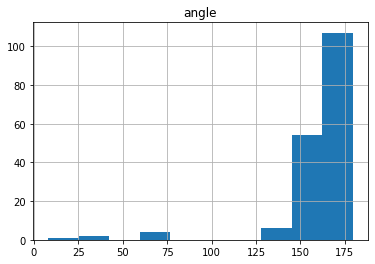

In [23]:
rarm_angle.hist()

In [24]:
# 어깨가 얼마나 돌아갔는가

In [33]:
shoulder_rotate = pd.DataFrame()

In [34]:
for id, data in kp.items():
  rshoulder = np.array(data[1][5])
  neck = np.array(data[1][1])
  parallel = np.array(rshoulder[0], neck[1])

  angle = p3_angle(rshoulder, neck, parallel)
  shoulder_rotate.loc[id, 'angle'] = angle

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50e9191850>]],
      dtype=object)

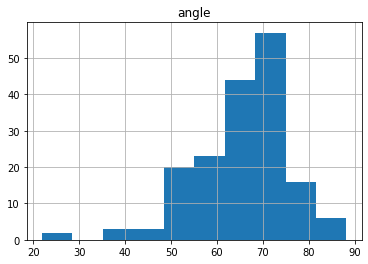

In [35]:
shoulder_rotate.hist()

## 2번 Backswing 자세

### (정면)왼 발이 땅에서 떨어지면 안됌

어드레스 시 왼 발의 좌표와 백스윙 시 좌표를 비교
- 발꿈치: 21
- 발목 : 14

In [ ]:
for id, data in kp.items():
  lf_address = np.array(data[0][21])
  lf_backswing = np.array(data[2][21])
  print(lf_address - lf_backswing)

## 3번 Top 자세

### (정면)왼팔의 구부러짐
openpose keypoints
오른팔 5, 6, 7
왼팔  2, 3, 4

https://www.golfdistillery.com/swing-thoughts/backswing/keep-left-arm-straight/

손을 몸에서 가장 멀리 밀면 스윙하는 동안 손이 가장 먼 거리를 이동하게 된다.
또한, 왼팔이 구부러지지 않게 하면 샷의 일관성과 신뢰성이 향상된다.
유연성이 좋지 않거나 고령의 골퍼의 경우 팔꿈치를 약간 구부리는 것으로 거리를 조금 더 낼 수 있으므로 약간의 구부러짐은 허용된다.

어깨, 팔꿈치, 손목 3개의 좌표의 각도를 비교한다.
5번, 6번, 7번
https://manivannan-ai.medium.com/find-the-angle-between-three-points-from-2d-using-python-348c513e2cd


In [46]:
# 키 포인트를 담을 df
left_arm_kp = pd.DataFrame()

In [47]:
for id, points in kp.items():
  # print(id)
  p = points[3] # top 자세에서 모든 관절 keypoints
  # print(p[5]) # top 자세에서 5번 관절(왼쪽 어깨)

  left_arm_kp.loc[id, '5x'] = p[5][0] # x 좌표
  left_arm_kp.loc[id, '5y'] = p[5][1] # y 좌표

  left_arm_kp.loc[id, '6x'] = p[6][0] # x 좌표
  left_arm_kp.loc[id, '6y'] = p[6][1] # y 좌표

  left_arm_kp.loc[id, '7x'] = p[7][0] # x 좌표
  left_arm_kp.loc[id, '7y'] = p[7][1] # y 좌표

  angle = p3_angle(np.array(p[5]), np.array(p[6]), np.array(p[7]))
  left_arm_kp.loc[id, 'angle'] = angle # 3 점 사이 각도

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [48]:
for i in left_arm_kp['angle']:
  print(i)

116.05113369717623
175.93708941336203
97.32858686761733
47.00306192816498
145.9996095673303
98.42144090428576
138.08299634685147
98.4047322828043
51.26862641514376
94.49941498207838
166.87499651995765
122.50375550247202
150.81851579765194
171.86610283918932
83.30500345117031
141.1420845227078
nan
50.685283714990256
85.50873176762228
130.52892647252577
137.14323269806604
133.83374423572724
120.70916415410812
148.4732240661596
119.30870583062794
97.04090052760527
107.05351950841619
22.283879345679416
124.25013703096131
86.45289469399951
32.8985974118709
124.15960990164226
nan
80.3387303122059
13.81435411881553
nan
159.0871591953419
159.3980458724972
114.03434419474772
106.66376050269648
37.973910879463
170.62032768178278
81.78131457876671
nan
156.8712294242799
95.27042571253003
125.40369327963275
70.36895905611975
90.03412259310231
106.56955964782341
148.8181388500588
114.18143611257366
99.29874289772027
106.15432178223276
153.77060524432267
37.38898532077274
116.83998964052043
85.517375

In [49]:
left_arm_kp['angle'].isnull().value_counts()

False    167
True       7
Name: angle, dtype: int64

(array([ 3.,  9., 11., 15., 22., 21., 32., 22., 16., 16.]),
 array([  3.79550813,  21.22401984,  38.65253155,  56.08104326,
         73.50955497,  90.93806668, 108.36657839, 125.79509011,
        143.22360182, 160.65211353, 178.08062524]),
 <a list of 10 Patch objects>)

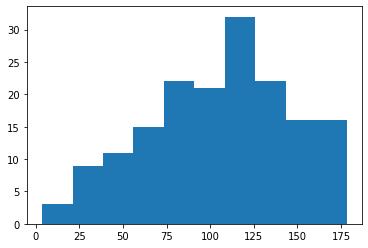

In [50]:
plt.hist(left_arm_kp['angle'])

In [51]:
left_arm_kp.loc[left_arm_kp['angle'] < 50]

,5x,5y,6x,6y,7x,7y,angle
19,0.489608,0.402498,0.489616,0.454212,0.448864,0.416226,47.003062
231,0.541196,0.402547,0.562903,0.440664,0.000000,0.000000,22.283879
248,0.500429,0.340054,0.516724,0.383610,0.000000,0.000000,32.898597
273,0.530321,0.402625,0.535805,0.448791,0.511325,0.383624,13.814354
287,0.500429,0.359096,0.514015,0.416205,0.486805,0.394449,37.973911
408,0.489550,0.399896,0.500425,0.462372,0.000000,0.000000,37.388985
440,0.516763,0.367344,0.514116,0.424362,0.492175,0.378176,28.068388
492,0.492413,0.389066,0.495063,0.448713,0.000000,0.000000,45.267740
551,0.513989,0.408116,0.511247,0.421550,0.486872,0.389057,48.411947
789,0.476033,0.421588,0.478724,0.503185,0.443391,0.432542,24.683631


각도가 비정상적으로 작은 경우
openpose 좌표가 문제인 경우이다.
사진으로 확인해보면 제대로 된 관절 좌표가 찍히지 않았다.
백스윙 시에는 몸이 최대로 회전해 왼쪽 어깨가 오른쪽으로, 오른쪽 어깨가 왼쪽으로 돌아가므로 오픈포즈가 왼 어깨를 오른 어깨로 인식하는 등 오류가 발생

현재 비디오는 화질이 낮아서 고화질의 비디오를 오픈 포즈에 넣었을 때 오류가 줄어드는 지 체크해봐야한다.

In [52]:
left_arm_kp.loc[left_arm_kp['angle'] > 150]

,5x,5y,6x,6y,7x,7y,angle
10,0.475977,0.410752,0.492200,0.473279,0.503163,0.505840,175.937089
74,0.511299,0.337486,0.489532,0.329219,0.000000,0.000000,166.874997
127,0.427062,0.383555,0.402697,0.340020,0.402657,0.296542,150.818516
150,0.495038,0.361882,0.497668,0.315675,0.505882,0.274907,171.866103
276,0.486887,0.321061,0.443388,0.310166,0.000000,0.000000,159.087159
277,0.465030,0.356400,0.435238,0.299309,0.426967,0.231508,159.398046
297,0.541190,0.413521,0.533088,0.388997,0.527559,0.353699,170.620328
328,0.492362,0.402533,0.470538,0.364616,0.437917,0.340081,156.871229
392,0.535703,0.378133,0.514004,0.369964,0.473288,0.326516,153.770605
462,0.543884,0.359191,0.532989,0.340184,0.530304,0.315714,156.440037


내 컴퓨터
타이거 우즈 스윙 18번 프레임 json data

In [53]:
json_data = json.loads('{"version":1.3,"people":[{"person_id":[-1],"pose_keypoints_2d":[0.434974,0.371288,0.0769262,0.52476,0.384899,0.82251,0.579512,0.357585,0.812163,0.390154,0.352164,0.593965,0.330234,0.284135,0.803583,0.459995,0.420327,0.696041,0.315379,0.354972,0.807621,0.260623,0.275955,0.86756,0.52474,0.575699,0.707395,0.454727,0.572929,0.731835,0.380369,0.714585,0.80882,0.340302,0.897208,0.827612,0.59444,0.578433,0.660975,0.634364,0.747351,0.85507,0.679233,0.902498,0.782383,0,0,0,0,0,0,0.53458,0.335913,0.129549,0.499867,0.354901,0.234052,0.7091,0.927299,0.766319,0.739061,0.924458,0.859522,0.654435,0.918903,0.747228,0.320325,0.924494,0.815672,0.295219,0.921656,0.833836,0.355292,0.910801,0.724305],"face_keypoints_2d":[],"hand_left_keypoints_2d":[],"hand_right_keypoints_2d":[],"pose_keypoints_3d":[],"face_keypoints_3d":[],"hand_left_keypoints_3d":[],"hand_right_keypoints_3d":[]}]}')

In [54]:
woods_18_kp = json_data['people'][0]['pose_keypoints_2d']

In [55]:
woods_5 = np.array([woods_18_kp[3 * 5 + 0],
                   woods_18_kp[3 * 5 + 1]])
woods_6 = np.array([woods_18_kp[3 * 6 + 0],
                   woods_18_kp[3 * 6 + 1]])
woods_7 = np.array([woods_18_kp[3 * 7 + 0],
                   woods_18_kp[3 * 7 + 1]])

In [56]:
p3_angle(woods_5, woods_6, woods_7)

149.03980434102647

### (정면)공을 향해 왼쪽 무릎 이동

백스윙 중에 왼쪽 무릎이 공을 향해 약간 아래쪽으로 움직이는 것
체중이동에 도움이 된다.

reverse pivot
백스윙 중에는 앞발로, 다운 스윙 중에는 뒷발로 체중이 이동하는 것
https://www.golfdistillery.com/swing-errors/reverse-pivot/

### (정면)등이 공을 바라보고 있음

등이 공을 향해있다는 것은 골반과 어깨가 충분히 회전했다는 것을 의미
회전이 과다하여 일정 포인트를 벗어나거나
회전이 작아 포인트에 도달하지 못 하고 팔로만 하는 스윙이 되는 것도 문제

3번 탑 자세에서
- 왼 어깨 : 5
- 목 : 1
- 오른 어깨: 2
- 왼 발: 14
- 어깨가 이루는 선과 왼발의 좌표를 비교하면 가능할 듯

In [57]:
back_face = pd.DataFrame()

In [71]:
for id, data in kp.items():
  lshoulder = data[3][5]
  rshoulder = data[3][2]
  lfoot = data[3][14]

  angle = p3_angle(lfoot, rshoulder, lshoulder)
  back_face.loc[id, 'angle'] = angle

In [70]:
back_face

,angle
8,90.249534
10,106.103853
14,113.601729
19,90.562041
25,104.262174
...,...
1348,99.408690
1352,82.909703
1374,103.549656
1388,102.986562


#### 문제: 
이상하게 각도가 크다. 70 ~ 90도  
타이거 우즈 스윙은 30도

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50e90ae290>]],
      dtype=object)

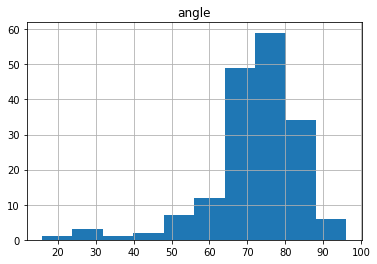

In [72]:
back_face.hist()

In [68]:
woods_angle = p3_angle(woods_data[3][14], woods_data[3][2], woods_data[3][5])
woods_angle

29.18788

### (정면)헤드 포지션이 일정한지

일정한 헤드 포지션은 즉, 어드레스 시 만들었던 척추 각도를 유지하는 것을 말함.
이는 어드레스에서 임팩트까지 안정된 스윙 궤도를 만들어줌  
척추 각도가 불안정하면 스윙 궤도 또한 불안정해져 일관된 샷을 칠 수 없음  
  
어드레스, 탑 헤드 좌표를 비교한다.
- 코: 0


In [3]:
nose = pd.DataFrame()

In [11]:
for id, data in kp.items():
  nose_address = data[0][0]
  nose_top = data[3][0]
  diff = np.array(nose_address) - np.array(nose_top)
  nose.loc[id, 'diff_x'] = diff[0]
  nose.loc[id, 'diff_y'] = diff[1]


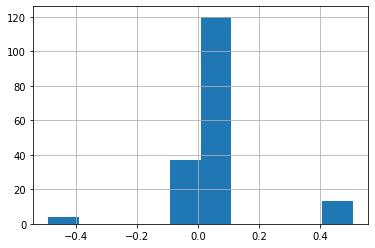

In [13]:
nose['diff_x'].hist()

## 4번 downswing 자세

## 5번 Impact 자세

### (정면)리버스 피벗
https://www.golfdistillery.com/swing-errors/reverse-pivot/

리버스 피벗이란 정상적인 체중 이동과는 반대로 체중 이동하는 것을 말하는 것
백스윙 시에 왼발로, 다운스윙 시에 오른발로 체중이동하는 것

정상적인 스윙
어드레스 : 양 발에 동등하게 무게 중심
백스윙 : 뒷발(오른발)에 무게 중심
다운스윙 : 앞발(왼발)에 무게 중심
팔로우 스루 : 모든 무게 중심을 앞발로

반대로 된 체중이동은 공에 임팩트 시 제대로 된 힘을 전달할 수 없다.

임팩트 시에 무게 중심이 뒷 발에 있는 골퍼의 경우
스윙 궤도가 볼의 뒤에 있게 되므로
헤드가 볼의 윗 부분을 때리게 되는 thin shot 이 나오게 된다.

임팩트 시 왼쪽 어깨가 왼발과 같은 라인을 이루는 것이 좋은 샷이라고 가정
(상체가 오른쪽으로 약간 이동한 상태)
왼쪽 어깨 x좌표가 왼쪽 발 x좌표에서 많이 떨어졌는 가를 체크한다



In [ ]:
# 넘파이 좌표의 차를 리턴하는 함수
def compare_points(a, b):
  a = np.array(a)
  b = np.array(b)
  return a - b

In [ ]:
kp_ = pd.DataFrame()

In [ ]:
for id, points in kp.items():
  p = points[5]
  
  kp_.loc[id, '5x'] = p[5][0]   # 왼 어깨
  kp_.loc[id, '5y'] = p[5][1]

  kp_.loc[id, '14x'] = p[14][0]   # 왼 발목
  kp_.loc[id, '14y'] = p[14][1]

  kp_.loc[id, 'x_diff'] = compare_points(p[5], p[14])[0]

In [ ]:
kp_

,5x,5y,14x,14y,x_diff
8,0.478676,0.315695,0.541175,0.685239,-0.062499
10,0.508586,0.397168,0.552081,0.774882,-0.043495
14,0.522180,0.378069,0.552100,0.758580,-0.029920
19,0.533033,0.389083,0.576478,0.728566,-0.043445
25,0.508615,0.361980,0.573769,0.723250,-0.065154
...,...,...,...,...,...
1348,0.557573,0.405279,0.590101,0.793927,-0.032528
1352,0.530295,0.413501,0.557592,0.728633,-0.027297
1374,0.516687,0.364513,0.560217,0.750329,-0.043530
1388,0.560192,0.380786,0.600870,0.788506,-0.040678


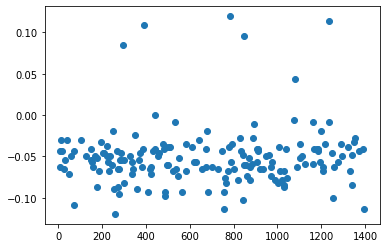

In [ ]:
plt.scatter(kp_.index, kp_['x_diff'])

In [ ]:
kp_['x_diff'].max()

0.11950900000000003

In [ ]:
kp_['x_diff'].min()

-0.11948600000000004

발목 좌표 - 어깨 좌표 대부분이 마이너스 결과
왼쪽 어깨가 왼쪽 발목보다 더 왼쪽

(array([ 7., 25., 75., 52.,  9.,  0.,  1.,  0.,  2.,  3.]),
 array([-1.19486e-01, -9.55865e-02, -7.16870e-02, -4.77875e-02,
        -2.38880e-02,  1.15000e-05,  2.39110e-02,  4.78105e-02,
         7.17100e-02,  9.56095e-02,  1.19509e-01]),
 <a list of 10 Patch objects>)

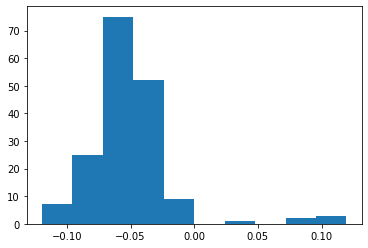

In [ ]:
plt.hist(kp_['x_diff'])

### (정면)너무 빠른 릴리즈 하지 않기




## 6번 Follow through 자세

### (정면)치킨윙
임팩트 후 왼 팔이 몸에 붙어있어야.
치킨윙은 임팩트 후 왼팔이 몸에서 떨어지면서 왼 팔꿈치가 하늘을 향하는  
몸의 회전이 부족해서 생기는 증상으로 비거리와 방향성에서 손해를 본다.  
임팩트 시 조금이라도 공의 윗 부분을 때릴 수 밖에 없음/ 완전한 회전이 이루어지지 않기때문에
  
  
  팔로우 스루 시 왼팔의 각도를 비교해본다.


In [17]:
chicken_wing = pd.DataFrame()

In [18]:
for id, data in kp.items():
  lshoulder = data[6][5]
  lelbow = data[6][6]
  lwrist = data[6][7]

  if (0 in lshoulder) or (0 in lelbow) or (0 in lwrist):
    continue

  angle = p3_angle(lshoulder, lelbow, lwrist)
  chicken_wing.loc[id, 'angle'] = angle

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96af6da210>]],
      dtype=object)

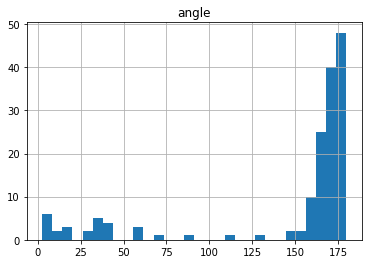

In [24]:
chicken_wing.hist(bins=30)

In [26]:
p3_angle(woods_data[6][5], woods_data[6][6], woods_data[6][7])

168.8728